In [30]:
import networkx as nx
from networkx_robustness import networkx_robustness
import matplotlib.pyplot as plt
import numpy as np
import random

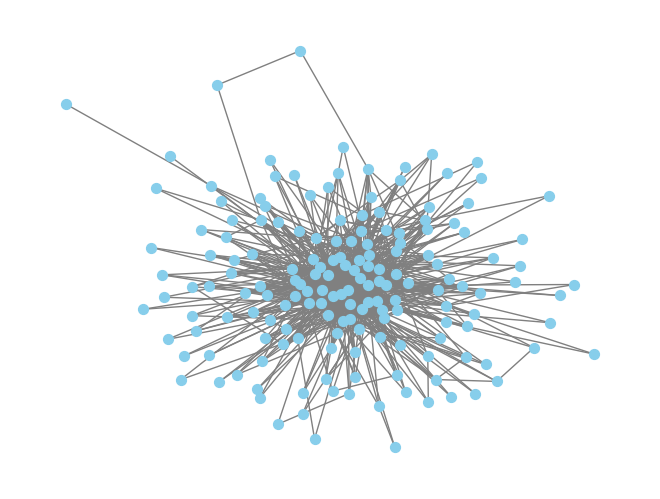

In [5]:
g = nx.DiGraph()

def create_graph():
    with open('gephitable.csv') as f:
        for row in f:
            s = row.split(',')
            g.add_edge(s[0], s[1], weight=int(s[2]))

create_graph()
RC = g.to_undirected()
RC
nx.draw(RC, with_labels=False, font_weight='bold', node_color='skyblue', font_color='black', edge_color='gray', node_size=50)
plt.show()

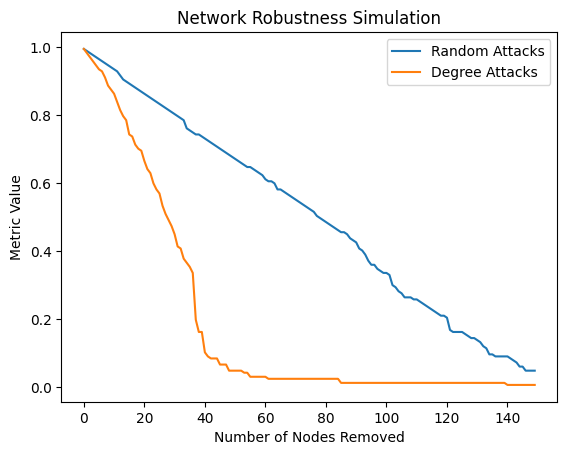

In [6]:
#random attack in 90% of nodes

initial, frac, apl = networkx_robustness.simulate_random_attack(RC, attack_fraction=0.9)
plt.plot(frac, label='Random Attacks')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Metric Value')
plt.title('Network Robustness Simulation')

##Degree attack
initial2, frac2, apl2 = networkx_robustness.simulate_degree_attack(RC, attack_fraction=0.9, weight=None)
plt.plot(frac2, label='Degree Attacks')
#plt.plot(apl, label='Average Path Length')

plt.legend()
plt.show()

In [6]:
critical_threshold = networkx_robustness.critical_threshold(RC)
print(critical_threshold)
molloy_reed = networkx_robustness.molloy_reed(RC)
print(molloy_reed)

None
30.76350662589195


In [8]:
## as undirected
RC.number_of_nodes()
RC.number_of_edges()
g.number_of_edges()

1246

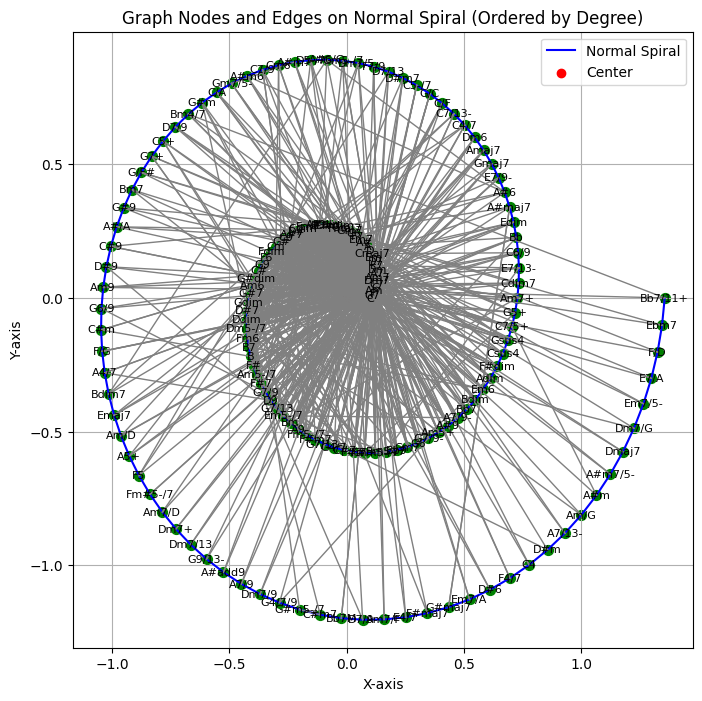

In [11]:
def normal_spiral_points(num_points, a=0.1, b=0.1):
    # Generate points for a normal spiral
    theta = np.linspace(0, 4 * np.pi, num_points)
    x = (a + b * theta) * np.cos(theta)
    y = (a + b * theta) * np.sin(theta)
    
    return x, y

# Number of nodes and points to generate
num_nodes = 167
num_points = 167

# Generate normal spiral points
x, y = normal_spiral_points(num_points)

# Sort nodes by degree (higher degree in the center)
sorted_nodes = sorted(g.nodes(), key=lambda x: g.degree(x), reverse=True)

# Plot the normal spiral with nodes and edges
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Normal Spiral', color='blue')
plt.scatter(0, 0, color='red', label='Center')

# Plot nodes on the spiral in order of degree
for i, node in enumerate(sorted_nodes):
    plt.scatter(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], color='green', s=50)
    plt.text(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], str(node), color='black', fontsize=8, ha='center', va='center')

# Plot edges
for edge in g.edges():
    pos1 = sorted_nodes.index(edge[0])
    pos2 = sorted_nodes.index(edge[1])
    plt.plot([x[pos1 * (num_points // num_nodes)], x[pos2 * (num_points // num_nodes)]],
             [y[pos1 * (num_points // num_nodes)], y[pos2 * (num_points // num_nodes)]],
             color='gray', linestyle='-', linewidth=1)

plt.title('Graph Nodes and Edges on Normal Spiral (Ordered by Degree)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


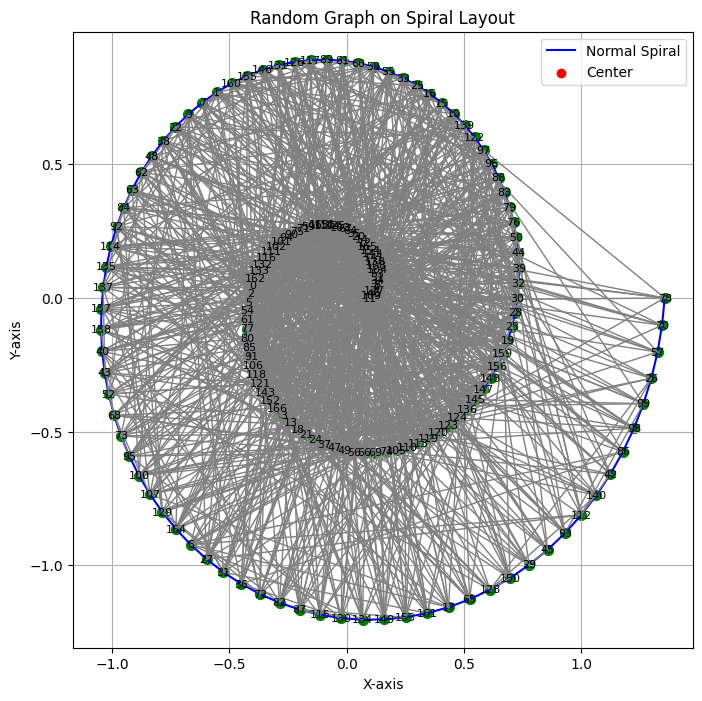

In [12]:
# Number of nodes and points to generate
num_nodes = 167
num_points = 167
edges=1246
# Generate normal spiral points
x, y = normal_spiral_points(num_points)

# Create a graph
G=nx.gnm_random_graph(num_nodes, edges)

# Sort nodes by degree (higher degree in the center)
sorted_nodes = sorted(G.nodes(), key=lambda x: G.degree(x), reverse=True)

# Plot the normal spiral with nodes and edges
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Normal Spiral', color='blue')
plt.scatter(0, 0, color='red', label='Center')

# Plot nodes on the spiral in order of degree
for i, node in enumerate(sorted_nodes):
    plt.scatter(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], color='green', s=50)
    plt.text(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], str(node), color='black', fontsize=8, ha='center', va='center')

# Plot edges
for edge in G.edges():
    pos1 = sorted_nodes.index(edge[0])
    pos2 = sorted_nodes.index(edge[1])
    plt.plot([x[pos1 * (num_points // num_nodes)], x[pos2 * (num_points // num_nodes)]],
             [y[pos1 * (num_points // num_nodes)], y[pos2 * (num_points // num_nodes)]],
             color='gray', linestyle='-', linewidth=1)

plt.title('Random Graph on Spiral Layout')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

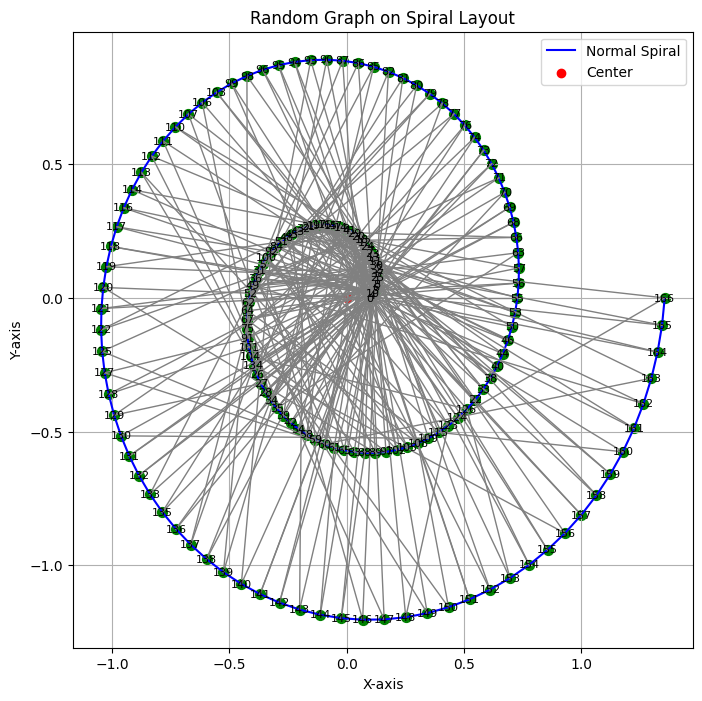

In [13]:
# Number of nodes and points to generate
num_nodes = 167
num_points = 167
# Generate normal spiral points
x, y = normal_spiral_points(num_points)

# Create a graph
G2=nx.barabasi_albert_graph(num_nodes, 2)

# Sort nodes by degree (higher degree in the center)
sorted_nodes = sorted(G2.nodes(), key=lambda x: G2.degree(x), reverse=True)

# Plot the normal spiral with nodes and edges
plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Normal Spiral', color='blue')
plt.scatter(0, 0, color='red', label='Center')

# Plot nodes on the spiral in order of degree
for i, node in enumerate(sorted_nodes):
    plt.scatter(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], color='green', s=50)
    plt.text(x[i * (num_points // num_nodes)], y[i * (num_points // num_nodes)], str(node), color='black', fontsize=8, ha='center', va='center')

# Plot edges
for edge in G2.edges():
    pos1 = sorted_nodes.index(edge[0])
    pos2 = sorted_nodes.index(edge[1])
    plt.plot([x[pos1 * (num_points // num_nodes)], x[pos2 * (num_points // num_nodes)]],
             [y[pos1 * (num_points // num_nodes)], y[pos2 * (num_points // num_nodes)]],
             color='gray', linestyle='-', linewidth=1)

plt.title('Random Graph on Spiral Layout')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
G2.number_of_edges()

330

Original Robustness (size of largest CC): 167
Robustness after Link Attack (size of largest CC): 151


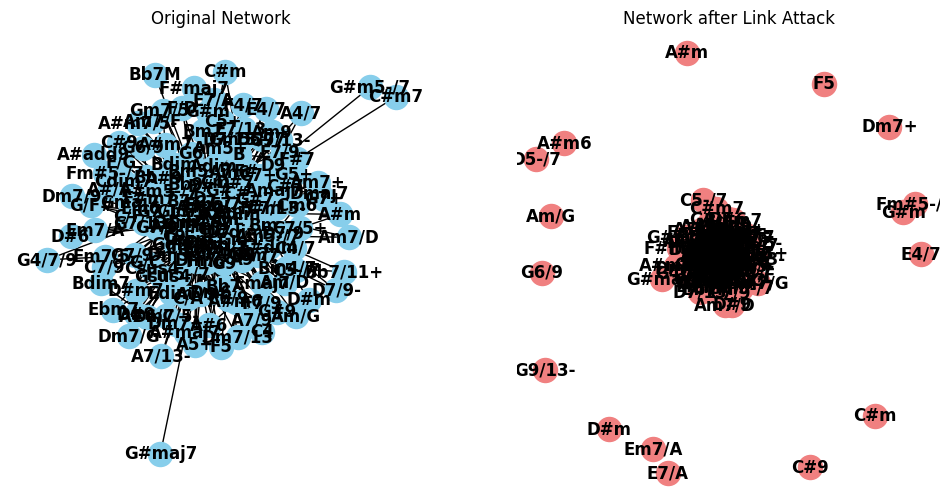

In [42]:
# Create a random graph (replace this with your own network data)

# Measure the robustness of the original network
original_size_largest_cc = len(max(nx.connected_components(RC), key=len))

print("Original Robustness (size of largest CC):", original_size_largest_cc)

# Perform a link attack by removing a fraction of edges
fraction_to_remove = 0.5
edges_to_remove = int(fraction_to_remove * RC.number_of_edges())
random_edges = list(RC.edges())
removed_edges = random.sample(random_edges,edges_to_remove)

G_attack = RC.copy()
G_attack.remove_edges_from(removed_edges)

# Measure the robustness after the link attack
attack_size_largest_cc = len(max(nx.connected_components(G_attack), key=len))

print("Robustness after Link Attack (size of largest CC):", attack_size_largest_cc)

# Visualize the original and attacked networks
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw(RC, with_labels=True, font_weight='bold', node_color='skyblue')
plt.title('Original Network')

plt.subplot(1, 2, 2)
nx.draw(G_attack, with_labels=True, font_weight='bold', node_color='lightcoral')
plt.title('Network after Link Attack')

plt.show()


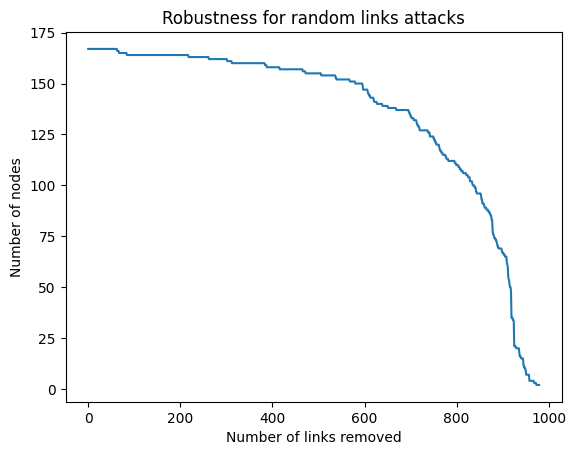

In [73]:
def link_robustness(G):
    G_attack = G.copy()
    y=[]
    x=[]
    connected_comp_length=len(max(nx.connected_components(G_attack), key=len)) #length of the connected component
    y.append(connected_comp_length) #start
    x.append(0)  #start
    for i in range(1,G.number_of_edges()-1):
        graph_edges = list(G_attack.edges())
        removed_edges = random.sample(graph_edges,1)
        G_attack.remove_edges_from(removed_edges)
        connected_comp_length= len(max(nx.connected_components(G_attack), key=len))
        x.append(i)
        y.append(connected_comp_length)
    return x ,y

x_values,y_values=link_robustness(RC)
# Plotting the line
plt.plot(x_values, y_values)

# Adding labels to the axes
plt.xlabel('Number of links removed')
plt.ylabel('Number of nodes')

# Adding a title to the plot
plt.title('Robustness for random links attacks')

# Display the plot
plt.show()

In [63]:
G_attack=RC.copy()
graph_edges = list(G_attack.edges())
removed_edges = random.sample(graph_edges,1)
G_attack.remove_edges_from(removed_edges)
connected_comp_length= len(max(nx.connected_components(G_attack)))
#x.append(i)
#y.append(connected_comp_length)